In [1]:
## Include mxnet path: you should include your mxnet local path, if mxnet path is global, 
## you don't need to include it.
import sys
sys.path.append('/data/guest_users/liangdong/liangdong/practice_demo')

import os
import mxnet as mx
import numpy as np
import copy
import re
from google.protobuf import text_format
import json
import cv2 as cv
import scipy
import PIL.Image
import math
import time
import scipy
import matplotlib
%matplotlib inline
import pylab as plt
from scipy.ndimage.filters import gaussian_filter
from generateLabelCPMWeight import *

from collections import namedtuple
Point = namedtuple('Point', 'x y')
crop_size_x = 368
crop_size_y = 368
center_perterb_max = 40

#use_caffe = True
scale_prob = 1
scale_min = 0.5
scale_max = 1.1
target_dist = 0.6

In [2]:
with open('pose_io/AI_data_val.json', 'r') as f:
    datas = json.load(f)
keyss = datas.keys()

In [3]:
len(keyss)

30000

In [4]:
len(datas[keyss[1]]['joint_self'])

14

In [5]:
str(datas[keyss[1]]['img_paths'])

'/data/guest_users/liangdong/liangdong/practice_demo/AIchallenger/validation_image/keypoint_validation_images_20170911/2745757779100045112005b49f603f8e08647ea5.jpg'

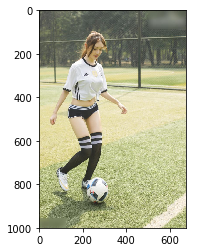

In [6]:
imgsequence = 50
cimage = cv.imread(datas[keyss[imgsequence]]['img_paths'])
plt.imshow(cimage[:, :, [2, 1, 0]])

In [7]:
datas[keyss[1]]['joint_self']

[[876, 270, 0],
 [801, 448, 1],
 [663, 440, 0],
 [720, 269, 0],
 [563, 337, 1],
 [621, 367, 1],
 [0, 0, 2],
 [0, 0, 2],
 [0, 0, 2],
 [0, 0, 2],
 [0, 0, 2],
 [0, 0, 2],
 [773, 70, 0],
 [790, 215, 0]]

In [8]:
datas[keyss[1]]

{u'annolist_index': 11544,
 u'bbox': [527, 50, 948, 632],
 u'bbox_other': {u'1': [5, 1, 646, 632], u'2': [441, 1, 778, 632]},
 u'image_id': 11544,
 u'img_height': 633,
 u'img_paths': u'/data/guest_users/liangdong/liangdong/practice_demo/AIchallenger/validation_image/keypoint_validation_images_20170911/2745757779100045112005b49f603f8e08647ea5.jpg',
 u'img_width': 950,
 u'isValidation': 0,
 u'joint_others': {u'1': [[279, 246, 0],
   [413, 380, 0],
   [571, 365, 0],
   [145, 227, 1],
   [332, 307, 1],
   [493, 291, 0],
   [0, 0, 2],
   [0, 0, 2],
   [0, 0, 2],
   [0, 0, 2],
   [0, 0, 2],
   [0, 0, 2],
   [220, 21, 0],
   [201, 182, 0]],
  u'2': [[521, 12, 0],
   [503, 163, 0],
   [475, 318, 0],
   [727, 13, 0],
   [747, 155, 1],
   [738, 288, 1],
   [559, 300, 1],
   [560, 510, 0],
   [0, 0, 2],
   [661, 306, 1],
   [664, 504, 0],
   [0, 0, 2],
   [0, 0, 2],
   [0, 0, 2]]},
 u'joint_self': [[876, 270, 0],
  [801, 448, 1],
  [663, 440, 0],
  [720, 269, 0],
  [563, 337, 1],
  [621, 367, 1],

In [9]:
cimage.shape

(1000, 676, 3)

In [10]:
datas[keyss[imgsequence]]['objpos']

[247, 507]

## Generate heatmap, pagmap and mask

In [11]:
image, mask, heatmap, pagmap = getImageandLabel(datas[keyss[imgsequence]])

1/右肩，2/右肘，3/右腕，4/左肩，5/左肘，6/左腕，7/右髋，8/右膝，9/右踝，10/左髋，11/左膝，12/左踝，13/头顶，14/脖子

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


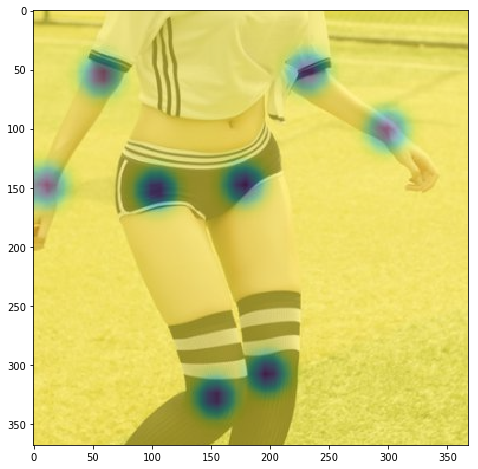

In [12]:
# part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, 
#             Lank, Leye, Reye, Lear, Rear, pt19]
heatmapScale = cv.resize(heatmap[14], (0, 0), fx=8, fy=8)

f = plt.figure(1)
plt.imshow(image[:,:,[2,1,0]])
ax2 = plt.imshow(heatmapScale, alpha=.5)
f.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)

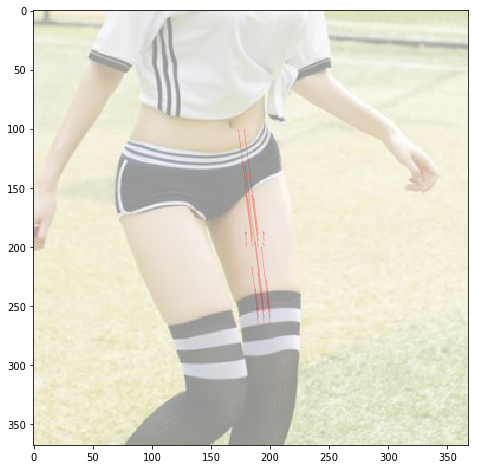

In [13]:
from numpy import ma

pagmapScale0 = cv.resize(pagmap[22], (0, 0), fx=8, fy=8)
pagmapScale1 = cv.resize(pagmap[23], (0, 0), fx=8, fy=8)
U = pagmapScale0 * -1
V = pagmapScale1
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.1*0.1] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

plt.figure()
plt.imshow(image[:,:,[2,1,0]], alpha = .5)
s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s], V[::s,::s], 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 8)